# 2024 3 19

In [461]:
from IPython.display import Image
%matplotlib inline

In [462]:
import pandas as pd

#匯入CSV檔

df = pd.read_csv('Sleep_Efficiency.csv')

In [463]:
#讀取各欄缺失值
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [464]:
# 將無用資料刪除
df.drop('ID', axis=1, inplace=True)
df.drop('Bedtime', axis=1, inplace=True)
df.drop('Wakeup time', axis=1, inplace=True)

In [465]:
from sklearn.impute import SimpleImputer
import numpy as np

# 將男性，女性轉換為1和2

size_mapping = {'Female': 1,
                'Male': 2}

df['Gender'] = df['Gender'].map(size_mapping)

# 將是否有抽菸轉會為有抽菸為1，沒抽菸為0

size_mapping2 = {'Yes': 1,
                'No': 0}

# 將上述規則覆蓋到資料集
df['Smoking status'] = df['Smoking status'].map(size_mapping2)

# 將每列的缺失值以平均替代
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)


In [466]:
import pandas as pd
# 計算每個特徵的中位數、平均數、標準差和四分位距
statistics = df.describe()


print("\n統計資料：")
print(statistics)



統計資料：
              Age      Gender  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean    40.285398    1.504425        7.465708          0.788916   
std     13.172250    0.500534        0.866625          0.135237   
min      9.000000    1.000000        5.000000          0.500000   
25%     29.000000    1.000000        7.000000          0.697500   
50%     40.000000    2.000000        7.500000          0.820000   
75%     52.000000    2.000000        8.000000          0.900000   
max     69.000000    2.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   

Text(0.5, 1.0, 'Age')

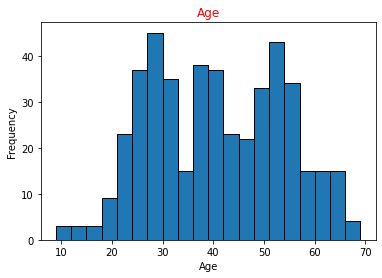

In [467]:
# 年紀的分布圖

import matplotlib.pyplot as plt

# 抓取年齡
ages = df['Age'].astype(int)

# 畫年齡直方圖
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age')
#plt.show()




(-1.1095559780289677,
 1.124036347041482,
 -1.1098942962962395,
 1.1217169852090212)

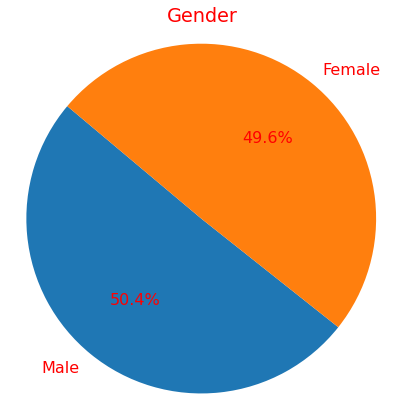

In [468]:
# 性別的圓餅圖

import matplotlib.pyplot as plt

# 統計各性別出現的次數
gender_counts = df['Gender'].value_counts()
gender_labels = {1: 'Female', 2: 'Male'}
labels = [gender_labels[label] for label in gender_counts.index]

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 16
plt.rcParams['text.color'] = 'red'
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender')
plt.axis('equal') 
#plt.show()



Text(0.5, 1.0, 'Sleep duration ')

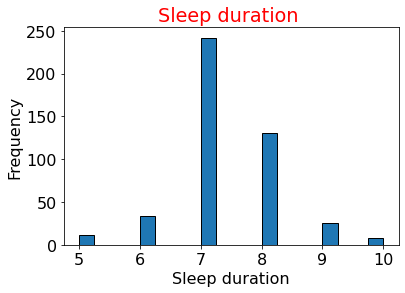

In [469]:
# 年齡的分布圖

import matplotlib.pyplot as plt

Sleep_duration = df['Sleep duration'].astype(int)

# 畫年齡直方圖
plt.hist(Sleep_duration, bins=20, edgecolor='black')
plt.xlabel('Sleep duration')
plt.ylabel('Frequency')
plt.title('Sleep duration ')
#plt.show()

201
251


Text(0.5, 1.0, 'Sleep Efficiency')

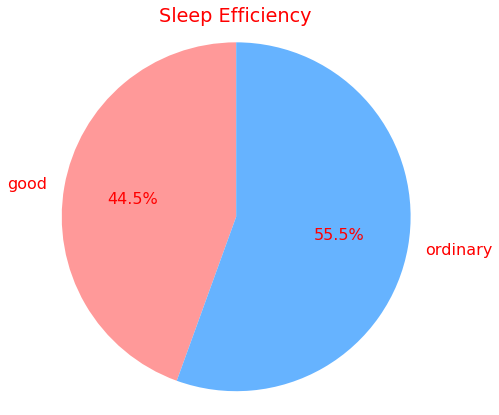

In [470]:
a = 0
b = 0
for i in df['Sleep efficiency']:
    if i >= 0.85:
        a+=1
    else:
        b+=1
print(a)

print(b)

import matplotlib.pyplot as plt

sizes = [a, b]
labels = ['good', 'ordinary']
colors = ['#ff9999', '#66b3ff']
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.size'] = 16
plt.rcParams['text.color'] = 'red'
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 確保圓餅圖是正圓的
plt.title('Sleep Efficiency', color='red')  # 圖表標題，紅色字體
#plt.show()

Text(0.5, 1.0, 'REM sleep percentage')

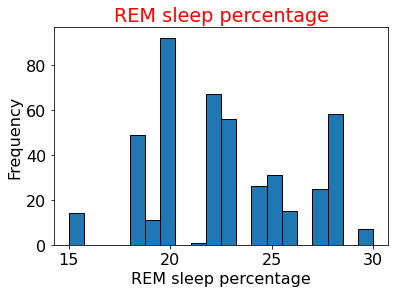

In [471]:
# 眼動頻率的分布圖

import matplotlib.pyplot as plt

REM = df['REM sleep percentage'].astype(int)

# 畫眼動頻率直方圖
plt.hist(REM, bins=20, edgecolor='black')
plt.xlabel('REM sleep percentage')
plt.ylabel('Frequency')
plt.title('REM sleep percentage')
#plt.show()

Text(0.5, 1.0, 'Deep sleep percentage')

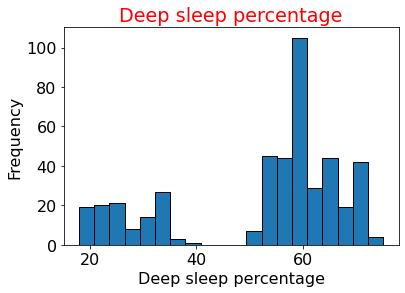

In [472]:
# 深眠占比的分布圖

import matplotlib.pyplot as plt

DEEP = df['Deep sleep percentage'].astype(int)

# 深眠占比直方圖
plt.hist(DEEP, bins=20, edgecolor='black')
plt.xlabel('Deep sleep percentage')
plt.ylabel('Frequency')
plt.title('Deep sleep percentage')
#plt.show()

Text(0.5, 1.0, 'Light sleep percentage')

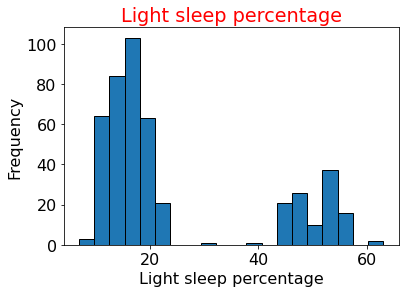

In [473]:
# 淺眠占比的分布圖

import matplotlib.pyplot as plt

Light = df['Light sleep percentage'].astype(int)

# 淺眠占比直方圖
plt.hist(Light, bins=20, edgecolor='black')
plt.xlabel('Light sleep percentage')
plt.ylabel('Frequency')
plt.title('Light sleep percentage')
#plt.show()

Text(0.5, 1.0, 'Awakenings')

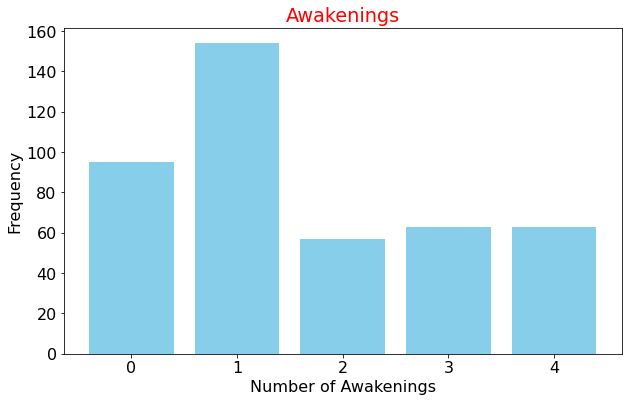

In [474]:
# 醒來次數的直方圖

import matplotlib.pyplot as plt
import pandas as pd

# 統計各醒來次數出現次數
awakenings_counts = df['Awakenings'].value_counts()

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.bar(awakenings_counts.index, awakenings_counts.values, color='skyblue')
plt.xlabel('Number of Awakenings')
plt.ylabel('Frequency')
plt.title('Awakenings')
#plt.show()

0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: Caffeine consumption, dtype: int64


Text(0.5, 1.0, 'Caffeine consumption')

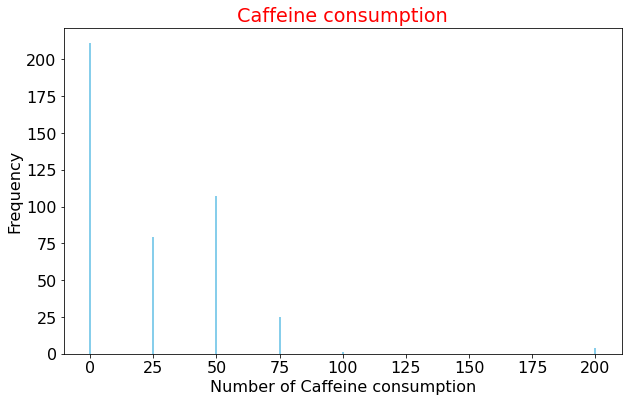

In [475]:
# 咖啡因攝入量的直方圖

import matplotlib.pyplot as plt
import pandas as pd

# 統計咖啡因攝入量
awakenings_counts = df['Caffeine consumption'].value_counts()
print(awakenings_counts)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.bar(awakenings_counts.index, awakenings_counts.values, color='skyblue')
plt.xlabel('Number of Caffeine consumption')
plt.ylabel('Frequency')
plt.title('Caffeine consumption')
#plt.show()

0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: Alcohol consumption, dtype: int64


Text(0.5, 1.0, 'Alcohol consumption')

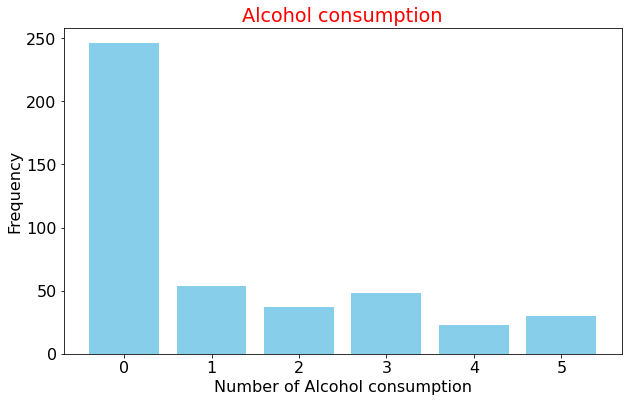

In [476]:
# 酒精攝入量（每週次數）的直方圖

import matplotlib.pyplot as plt
import pandas as pd

# 統計酒精攝入量（每週次數）
awakenings_counts = df['Alcohol consumption'].value_counts()
print(awakenings_counts)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.bar(awakenings_counts.index, awakenings_counts.values, color='skyblue')
plt.xlabel('Number of Alcohol consumption')
plt.ylabel('Frequency')
plt.title('Alcohol consumption')
#plt.show()

(-1.1163591780613715,
 1.1154474708832822,
 -1.1161296636175684,
 1.1172868081457574)

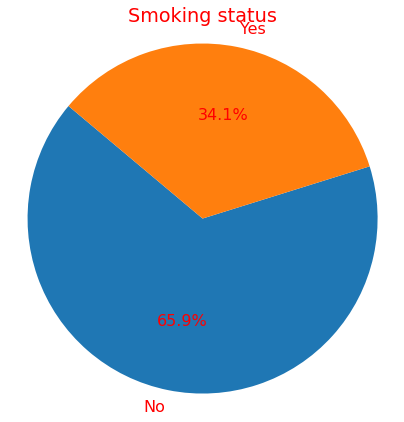

In [477]:
# 是否抽菸的圓餅圖

import matplotlib.pyplot as plt

# 統計抽菸人數
gender_counts = df['Smoking status'].value_counts()
gender_labels = {1: 'Yes', 0: 'No'}
labels = [gender_labels[label] for label in gender_counts.index]

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 16
plt.rcParams['text.color'] = 'red'
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Smoking status')
plt.axis('equal') 
#plt.show()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise frequency, dtype: int64


Text(0.5, 1.0, 'Exercise frequency')

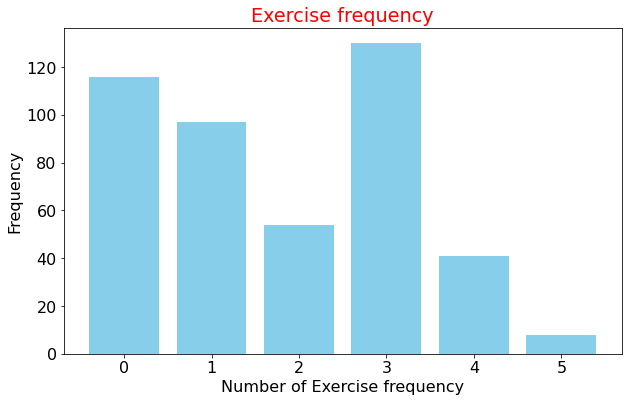

In [478]:
# 運動頻率的直方圖

import matplotlib.pyplot as plt
import pandas as pd

# 統計
awakenings_counts = df['Exercise frequency'].value_counts()
print(awakenings_counts)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.bar(awakenings_counts.index, awakenings_counts.values, color='skyblue')
plt.xlabel('Number of Exercise frequency')
plt.ylabel('Frequency')
plt.title('Exercise frequency')
#plt.show()

# 2024 3 26

In [479]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 使用資料中的深度睡眠百分比和咖啡因攝入量作為特徵進行邏輯斯回歸
X = df[['Deep sleep percentage','Caffeine consumption']]
y = df['Sleep efficiency']


#將睡眠效率以0.85分類為1類與0類
y = np.where(y >= 0.85, 1, 0)


# 處理缺失值，使用用平均值
X.fillna(X.mean(), inplace=True)

# 將資料分為訓練集和測試集，分割比例為7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\yoyo0\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [480]:
# 標準化(使用平均與標準差)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [481]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Sleep duration [standardized]')
    plt.ylabel('REM sleep percentage [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


In [482]:
#總共分為兩類

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)

Number of classes: 2


No handles with labels found to put in legend.
<ipython-input-481-c6df2746780f>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


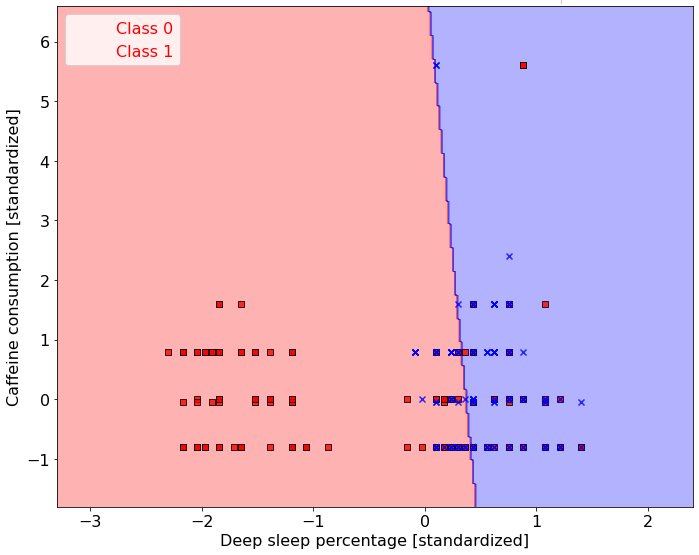

平方誤差: 0.375


In [483]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 建立邏輯斯回歸模型
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

# 訓練模型
lr.fit(X_train_std, y_train)

# 合併數據
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 繪圖
plot_decision_regions(X_combined_std, y_combined, classifier=lr)
plt.xlabel('Deep sleep percentage [standardized]')
plt.ylabel('Caffeine consumption [standardized]')
plt.legend(['Class 0', 'Class 1'], loc='upper left')  # 此處指定圖例標籤
plt.tight_layout()
plt.show()

# 計算均方誤差
y_pred = lr.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("平方誤差:", mse)
